In [1]:
import os
from os import path
from datetime import datetime
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib.ticker import MaxNLocator

plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
import seaborn as sns

In [4]:
filename = path.join('..', 'data', 'raw', 'BOLETIM_DIARIO_CORONAVIRUS_SAP.xlsx')

assert path.exists(filename), f"Caminho para o arquivo não existe:\n{filename}"

In [5]:
frame = pd.read_excel(filename,
                   index_col="DATA",
                   parse_dates=['DATA'],
                   engine='openpyxl')

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 458 entries, 2020-07-03 to 2021-10-03
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   DESCARTADOS          458 non-null    int64
 1   EM INVESTIGACAO      458 non-null    int64
 2   CONFIRMADOS          458 non-null    int64
 3   EXAMINADOS           458 non-null    int64
 4   RECUPERADOS          458 non-null    int64
 5   ATIVOS               458 non-null    int64
 6   HOSPITAL             458 non-null    int64
 7   DOMICILIO            458 non-null    int64
 8   OBITOS               458 non-null    int64
 9   CONFIRMADOS_DIA      458 non-null    int64
 10  RECUPERADOS_DIA      458 non-null    int64
 11  DESCARTADOS_DIA      458 non-null    int64
 12  OBITOS_DIA           458 non-null    int64
 13  ATIVOS_DIA           458 non-null    int64
 14  EM_INVESTIGACAO_DIA  458 non-null    int64
dtypes: int64(15)
memory usage: 57.2 KB


In [7]:
# frame['NOVOS_CASOS'] = frame['CONFIRMADOS'].diff(periods=1)
# frame['RECUPERADOS_DIA'] = frame['RECUPERADOS'].diff(periods=1)
# frame['DESCARTADOS_DIA'] = frame['DESCARTADOS'].diff(periods=1)

frame.head()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,CONFIRMADOS_DIA,RECUPERADOS_DIA,DESCARTADOS_DIA,OBITOS_DIA,ATIVOS_DIA,EM_INVESTIGACAO_DIA
DATA,,,,,,,,,,,,,,,
2020-07-03,690,263,105,1058,63,38,3,35,4,0,0,0,0,0,0
2020-07-04,709,251,109,1069,65,43,3,40,4,4,2,19,0,5,-12
2020-07-05,711,252,110,1073,71,35,3,32,4,1,6,2,0,-8,1
2020-07-06,722,293,121,1136,79,38,2,36,4,11,8,11,0,3,41
2020-07-07,794,264,126,1184,85,37,4,33,4,5,6,72,0,-1,-29


In [8]:
frame.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,CONFIRMADOS_DIA,RECUPERADOS_DIA,DESCARTADOS_DIA,OBITOS_DIA,ATIVOS_DIA,EM_INVESTIGACAO_DIA
DATA,,,,,,,,,,,,,,,
2021-09-29,16300,47,6905,23252,6710,43,2,41,152,7,0,18,0,7,2
2021-09-30,16323,50,6909,23282,6719,38,2,36,152,4,9,23,0,-5,3
2021-10-01,16355,58,6915,23328,6722,41,2,39,152,6,3,32,0,3,8
2021-10-02,16378,42,6923,23343,6726,45,2,43,152,8,4,23,0,4,-16
2021-10-03,16378,42,6923,23343,6731,40,2,38,152,0,5,0,0,-5,0


In [10]:
frame['2021-03-23':]['CONFIRMADOS_DIA'].sum()

4870

In [11]:
df = frame.resample('W-MON').sum()

In [12]:
df.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,CONFIRMADOS_DIA,RECUPERADOS_DIA,DESCARTADOS_DIA,OBITOS_DIA,ATIVOS_DIA,EM_INVESTIGACAO_DIA
DATA,,,,,,,,,,,,,,,
2021-09-06,110842,263,47577,158682,46176,351,29,322,1050,33,54,170,0,-21,-21
2021-09-13,111665,239,47744,159651,46444,245,33,212,1055,20,28,102,1,-9,15
2021-09-20,112646,318,47946,160910,46623,266,21,245,1057,41,21,159,0,20,-8
2021-09-27,113557,228,48186,161971,46808,319,21,298,1059,28,40,113,1,-13,-3
2021-10-04,98016,284,41473,139773,40318,243,13,230,912,28,22,111,0,6,16


In [14]:
import matplotlib.ticker as plticker



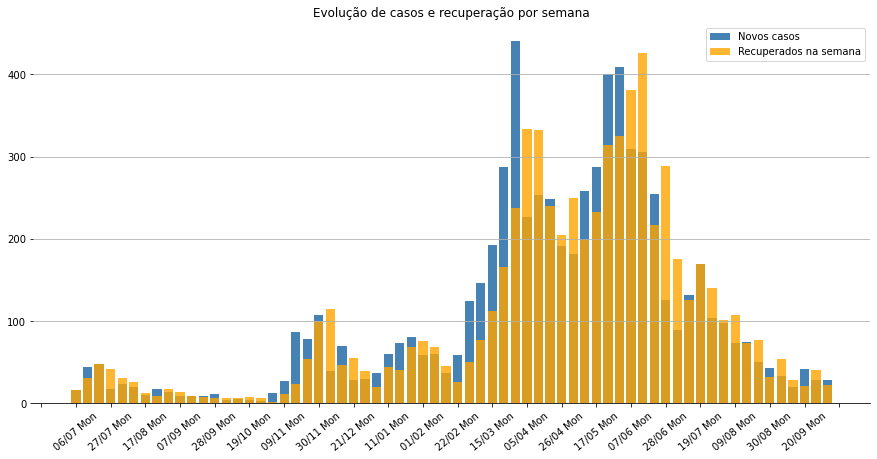

In [22]:
loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m %a") for date in df.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
# plt.bar(labels, df['DESCARTADOS_DIA'], color='green', alpha=0.8, label="Casos descartados na semana")
plt.bar(labels, df['CONFIRMADOS_DIA'], color='steelblue', label='Novos casos')
plt.bar(labels, df['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados na semana')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)

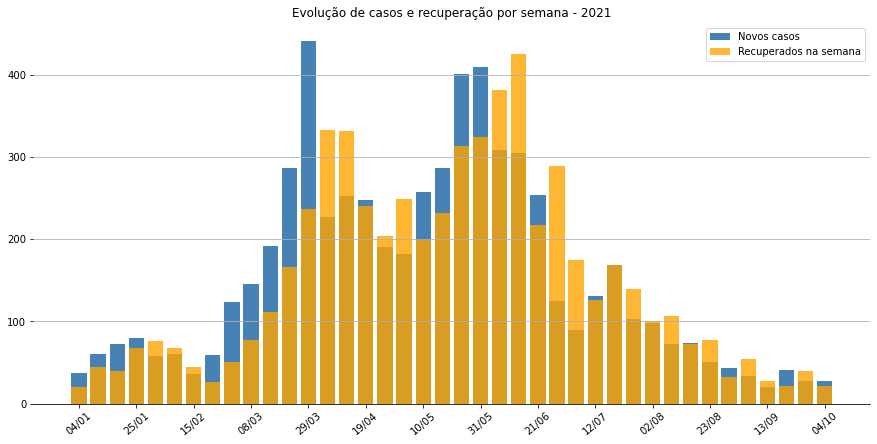

In [26]:
df = df['2021':]

labels = [date.strftime("%d/%m") for date in df.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
# plt.bar(labels, df['DESCARTADOS_DIA'], color='green', alpha=0.8, label="Casos descartados na semana")
plt.bar(labels, df['CONFIRMADOS_DIA'], color='steelblue', label='Novos casos')
plt.bar(labels, df['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados na semana')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana - 2021")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)

In [27]:
today = datetime.now()

today.strftime("%d/%m/%y %a")

'04/10/21 Mon'

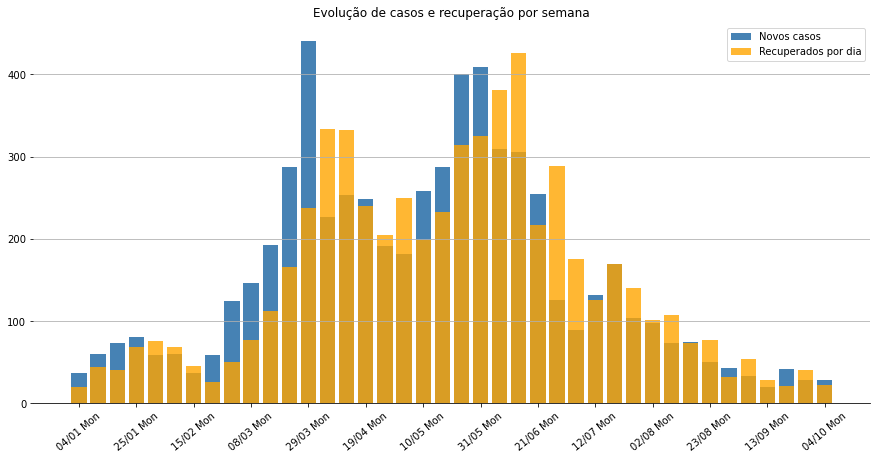

In [29]:
df2 = df['2020-11':]

loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m %a") for date in df2.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
plt.bar(labels, df2['CONFIRMADOS_DIA'], color='steelblue', label='Novos casos')
plt.bar(labels, df2['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados por dia')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)